In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
Job Title          350 non-null object
Salary Estimate    350 non-null object
Job Description    350 non-null object
Company Name       350 non-null object
Headquarters       350 non-null object
Size               350 non-null object
Founded            350 non-null int64
Type of nership    350 non-null object
Industry           350 non-null object
Sector             350 non-null object
Revenue            350 non-null object
Competitors        350 non-null object
dtypes: int64(1), object(11)
memory usage: 32.9+ KB


In [24]:
df = pd.read_csv("raw_dataset.csv", sep=";") 
frame=pd.read_csv("raw_dataset.csv", sep=";") 
frame=frame.rename(columns={'Job Title':'Job_Title', 'Job Description':'Job_Description'}) #re-name to get one-word column names

In [25]:
#Keep only columns for pie chart
df.drop(['Location', 'Rating'] ,axis=1, inplace=True)

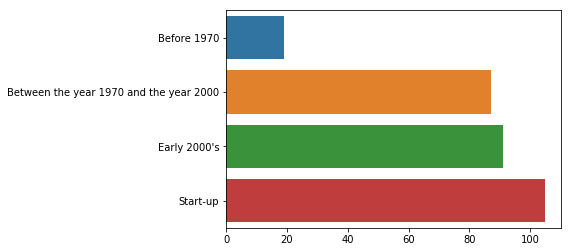

In [26]:
# Bar plot for companies hiring data scientist by year founded category
year=pd.Series(df['Founded']) #Create a series for year founded
year=year.astype(int)   # Cast year as int
year=year.dropna()

bins = [0,1970,2000,2010,2019]    
bin_names=['Before 1970', 'Between the year 1970 and the year 2000', 'Early 2000\'s', 'Start-up']

cats=pd.cut(year, bins,  labels=bin_names) # Year categories(bins)
year_founded_count=pd.value_counts(cats)   # Count per category
year_founded_count

label=pd.value_counts(cats) # Create a series of the counts

sns.barplot(y=label.index, x=label.values) # Map it

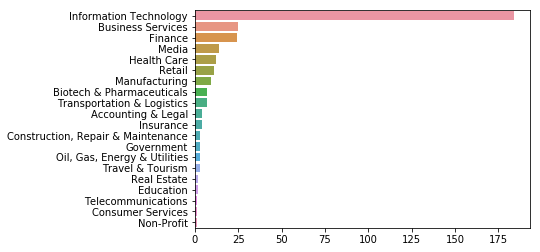

In [27]:
# Bar plot for companies hiring data scientist by sector
sector = df['Sector'] #Create a series for year founded
sector=sector.replace('-1', np.nan)
sector.dropna(inplace=True)

sector_counts=sector.value_counts()
sns.barplot(y=sector_counts.index, x=sector_counts.values) # Map it

In [28]:
# Normalizing group percentages to add to 1
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

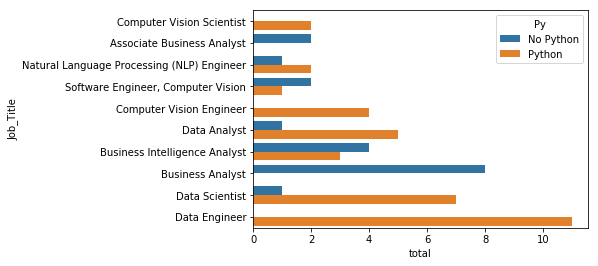

In [29]:
# Bar plot showing: Keywords by groups (sector, size, title etc)
# This example is for python required in different job title categoories
# Could adjust by deleting job descriptions that don't contain the qualifications
#df = pd.read_csv("raw_dataset.csv", sep=";") 

frame=pd.read_csv("raw_dataset.csv", sep=";") 
frame=frame.rename(columns={'Job Title':'Job_Title', 'Job Description':'Job_Description'}) #re-name to get one-word column names

cframe=frame[frame['Job_Description'].notnull()] # eliminate missing data
cframe=cframe[cframe['Job_Description'].str.contains('Qualifications')] # Choose only descriptions with qualifications

# Compute value for whether Python appears on Job Desc or not
cframe['Py'] = np.where(cframe['Job_Description'].str.contains('Python|python'), 'Python', 'No Python')
#cframe['Master'] = np.where(cframe['Job_Description'].str.contains('Master|master'), 'Master', 'No Master')

by_title_py=cframe.groupby(['Job_Title', 'Py']) # Group by job title and whether or not Python is required
#by_title_master=cframe.groupby(['Job_Title', 'Master']) # Group by job title and whether or not Master is required
#by_title_qualifications=cframe.groupby(['Job_Title', 'Qualifications'])

# Value counts by job title for different categories
by_title_py_counts=by_title_py.size().unstack().fillna(0) # Python required ?
#by_title_master_counts=by_title_master.size().unstack().fillna(0) # Master's Degree required?
#by_title_qualifications_counts=by_title_master.size().unstack().fillna(0)

# Index 
indexer = by_title_py_counts.sum(1).argsort()
#indexer_master = by_title_master_counts.sum(1).argsort()
#indexer_qualifications = by_title_qualifications_counts.sum(1).argsort()

# Select largest 10 rows of the values count
count_subset = by_title_py_counts.take(indexer[-10:]) 
#count_subset_master_degree = by_title_master_counts.take(indexer_master[-10:]) 
#count_subset_qualifications_degree = by_title_master_counts.take(indexer_master[-10:]) 

count_subset=count_subset.stack()
#count_subset_master_degree=count_subset_master_degree.stack()

count_subset.name = 'total'
#count_subset_master_degree.name = 'total'

count_subset = count_subset.reset_index()
#count_subset_master_degree = count_subset_master_degree.reset_index()


# Top job titles by Python and No-Python requirement
sns.barplot(x='total', y='Job_Title', hue='Py', data=count_subset)

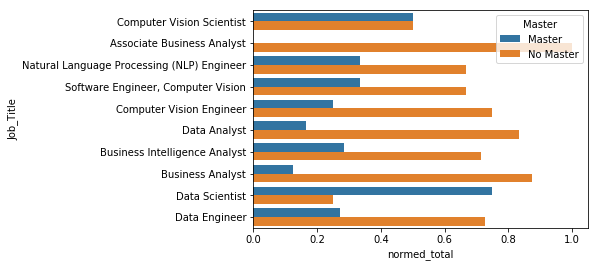

In [30]:
# Master Degree modeling
cframe=frame[frame['Job_Description'].notnull()] # eliminate missing data
cframe=cframe[cframe['Job_Description'].str.contains('Qualifications')] # Choose only descriptions with qualifications

# Add column indicating whether or not master degree is required
cframe['Master'] = np.where(cframe['Job_Description'].str.contains('Master|master|Master\'s|master\'s'), 'Master', 'No Master')

# Group by job title and whether or not Master is required
by_title_master=cframe.groupby(['Job_Title', 'Master'])

by_title_master_counts=by_title_master.size().unstack().fillna(0) # Master's Degree required?

indexer_master = by_title_master_counts.sum(1).argsort()

# Select largest 10 rows
count_subset_master_degree = by_title_master_counts.take(indexer_master[-10:]) 

count_subset_master_degree=count_subset_master_degree.stack()

count_subset_master_degree.name = 'total'

count_subset_master_degree = count_subset_master_degree.reset_index()

# Plot total master degree no master degree
#sns.barplot(x='total', y='Job_Title', hue='Master', data=count_subset_master_degree)


# Normalize data to add to 1 and plot it
results = count_subset_master_degree.groupby('Job_Title').apply(norm_total) # For master chart

sns.barplot(x='normed_total', y='Job_Title', hue='Master', data=results)

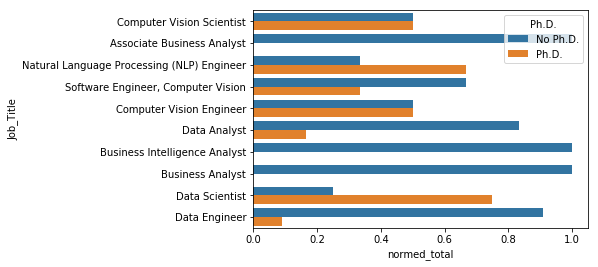

In [31]:
# Ph.D. modeling

# Add column indicating whether or not master degree is required
cframe['Ph.D.'] = np.where(cframe['Job_Description'].str.contains('Ph.D.|ph.d.|PhD|Ph.d'), 'Ph.D.', 'No Ph.D.')

# Group by job title and whether or not Master is required
by_title_phd=cframe.groupby(['Job_Title', 'Ph.D.'])

by_title_phd_counts=by_title_phd.size().unstack().fillna(0) #Ph.D. required?

indexer_phd = by_title_phd_counts.sum(1).argsort()

# Select largest 10 rows
count_subset_phd_degree = by_title_phd_counts.take(indexer_phd[-10:]) 

count_subset_phd_degree=count_subset_phd_degree.stack()

count_subset_phd_degree.name = 'total'

count_subset_phd_degree = count_subset_phd_degree.reset_index()

# Plot total master degree no master degree
#sns.barplot(x='total', y='Job_Title', hue='Ph.D.', data=count_subset_phd_degree)


# Normalize data to add to 1 and plot it
results = count_subset_phd_degree.groupby('Job_Title').apply(norm_total) # For master chart

sns.barplot(x='normed_total', y='Job_Title', hue='Ph.D.', data=results)

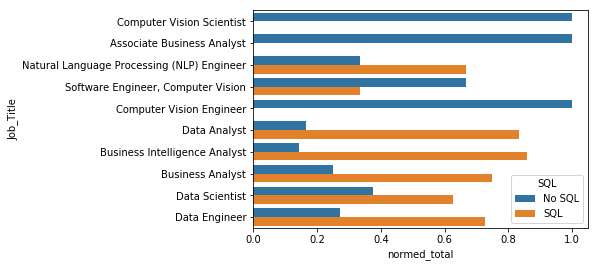

In [32]:
# SQL Modeling

cframe['SQL'] = np.where(cframe['Job_Description'].str.contains('sql|SQL'), 'SQL', 'No SQL')

# Group by job title and whether or not Master is required
by_title_sql=cframe.groupby(['Job_Title', 'SQL'])

by_title_sql_counts=by_title_sql.size().unstack().fillna(0) #Ph.D. required?

indexer_sql = by_title_sql_counts.sum(1).argsort()

# Select largest 10 rows
count_subset_sql_degree = by_title_sql_counts.take(indexer_sql[-10:]) 

count_subset_sql_degree=count_subset_sql_degree.stack()

count_subset_sql_degree.name = 'total'

count_subset_sql_degree = count_subset_sql_degree.reset_index()

#Plot total master degree no master degree
#sns.barplot(x='total', y='Job_Title', hue='SQL', data=count_subset_sql_degree)


# Normalize data to add to 1 and plot it
results = count_subset_sql_degree.groupby('Job_Title').apply(norm_total) # For master chart

sns.barplot(x='normed_total', y='Job_Title', hue='SQL', data=results)

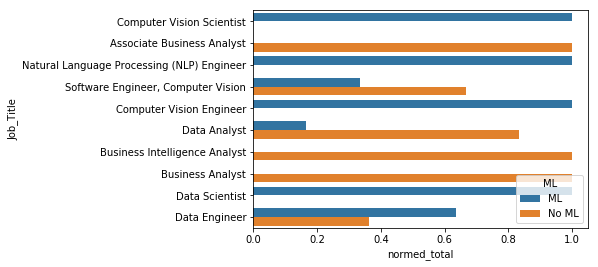

In [33]:
cframe['ML'] = np.where(cframe['Job_Description'].str.contains('machine learning|Machine learning|Machine Learning|Deep Learning'), 'ML', 'No ML')

# Group by job title and whether or not Master is required
by_title_ml=cframe.groupby(['Job_Title', 'ML'])

by_title_ml_counts=by_title_ml.size().unstack().fillna(0) #Ph.D. required?

indexer_ml = by_title_ml_counts.sum(1).argsort()

# Select largest 10 rows
count_subset_ml_degree = by_title_ml_counts.take(indexer_ml[-10:]) 

count_subset_ml_degree=count_subset_ml_degree.stack()

count_subset_ml_degree.name = 'total'

count_subset_ml_degree = count_subset_ml_degree.reset_index()

#Plot total master degree no master degree
#sns.barplot(x='total', y='Job_Title', hue='ML', data=count_subset_ml_degree)


# Normalize data to add to 1 and plot it
results = count_subset_ml_degree.groupby('Job_Title').apply(norm_total) # For master chart

sns.barplot(x='normed_total', y='Job_Title', hue='ML', data=results)